In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy
import os
from zipfile import ZipFile
from urllib.request import urlretrieve
from IPython.display import Image

In [44]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

def display_image(image):
    plt.clf()
    plt.imshow(image)
    plt.show()
    
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

## Cropping Images

<Figure size 640x480 with 0 Axes>

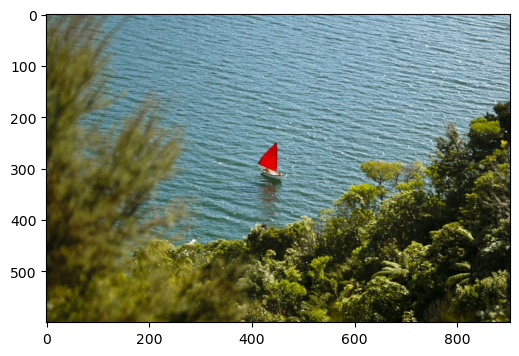

In [35]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]
display_image(img_NZ_rgb)

<Figure size 640x480 with 0 Axes>

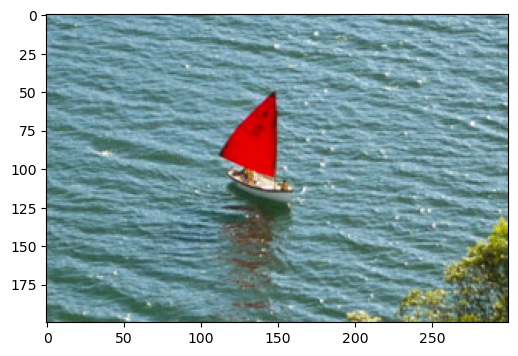

In [36]:
cropped_region = img_NZ_rgb[200:400, 300:600]
display_image(cropped_region)

## Resizing Images

<Figure size 640x480 with 0 Axes>

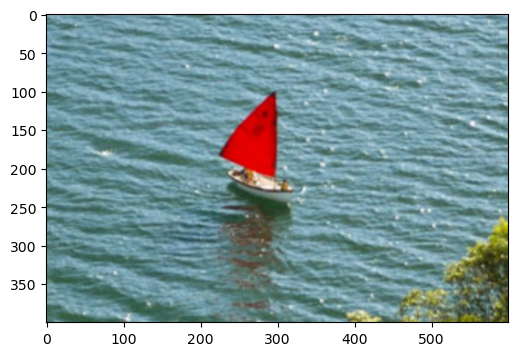

In [34]:
# Method 1
resized_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
display_image(resized_2x)

<Figure size 640x480 with 0 Axes>

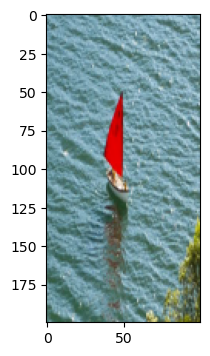

In [38]:
# Method 2
resized_img = cv2.resize(cropped_region, (100, 200), interpolation=cv2.INTER_AREA)
display_image(resized_img)

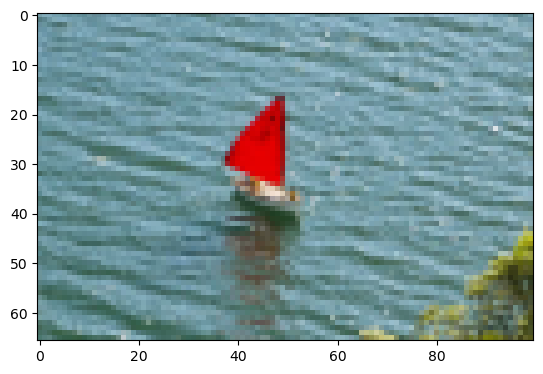

In [45]:
# Maintaing Aspect Ratio
width = 100
aspect_ratio = width / cropped_region.shape[1]
height = int(cropped_region.shape[0] * aspect_ratio)
resized_img_2 = cv2.resize(cropped_region, (width, height), interpolation=cv2.INTER_AREA)
display_image(resized_img_2)

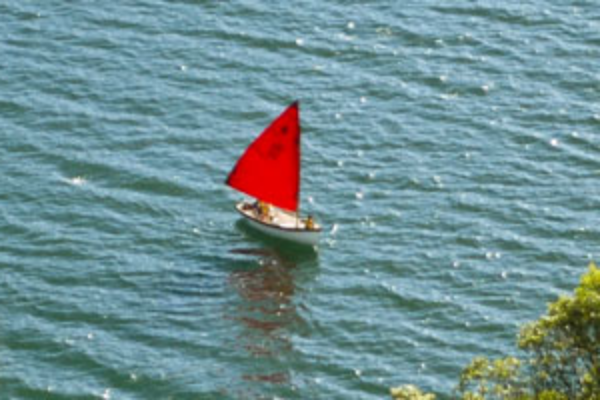

In [51]:
resized_2x = resized_2x[:, :, ::-1]
cv2.imwrite('resized_image_2x.png', resized_2x)
Image(filename='resized_image_2x.png')

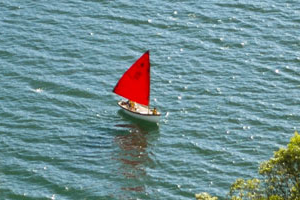

In [52]:
cropped_region = cropped_region[:, :, ::-1]
cv2.imwrite('cropped_region.png', cropped_region)
Image('cropped_region.png')

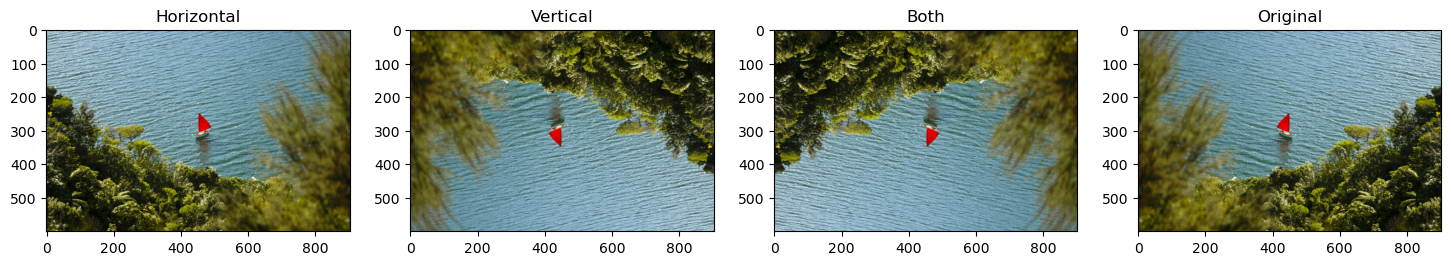

In [56]:
img_horz = cv2.flip(img_NZ_rgb, 1)
img_vert = cv2.flip(img_NZ_rgb, 0)
img_flip_both = cv2.flip(img_NZ_rgb, -1)

plt.figure(figsize=(18, 5))
plt.clf()
plt.subplot(141);plt.imshow(img_horz);plt.title('Horizontal')
plt.subplot(142);plt.imshow(img_vert);plt.title('Vertical')
plt.subplot(143);plt.imshow(img_flip_both);plt.title('Both')
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title('Original')
plt.show()